# Compare ML Algorithms

The goal is to learn:
1. How to formulate an experiment to directly compare ML algorithms
2. How to build a reusable template for evaluating the performance of multiple algorithms on one dataset
3. How to report and visualize the results when comparing algorithm performance.

## Consistent comparison of ML algos

The key to a fair comparison among ML algorithms is ensuring that each algorithm is evaluated in the same way on the same data. You can achieve this by forcing each algorithm to be evaluated on a consistent test harness. 

In the example below 6 different classification algorithms are compared on a single dataset:

* Logistic Regression
* Linear Discriminant Analysis
* k-Nearest Neighbors
* Classification and Regression Trees
* Naive Bayes
* Support Vector Machines

The dataset is the diabetes one. The problem has 2 classes and 8 numeric input variables of varying scales. The 10-fold cross-validation procedure is used to evaluate each algorithm, importantly configured with the same random seed to ensure that the same splits to the training data are performed and that each algorithm is evaluated in precisely the same way. Each algorithm is given a short name, useful for summarizing results afterward.

In [5]:
from pandas import read_csv
from matplotlib import pyplot
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression                         # <---
from sklearn.tree import DecisionTreeClassifier                             # <---
from sklearn.neighbors import KNeighborsClassifier                          # <---
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis        # <---
from sklearn.naive_bayes import GaussianNB                                  # <---
from sklearn.svm import SVC                                                 # <---

LR: 0.769515 (0.048411)
LDA: 0.773462 (0.051592)
KNN: 0.726555 (0.061821)
CART: 0.688722 (0.057521)
NB: 0.755178 (0.042766)
SVM: 0.651025 (0.072141)


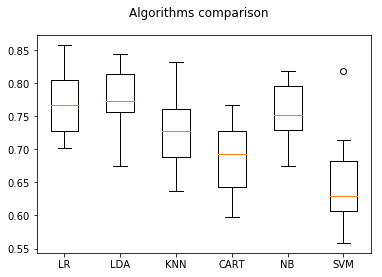

In [15]:
# Compare Algorithms

#load dataset
filename = 'pima-indians-diabetes.data.csv'
names = ['preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class']
dataframe = read_csv(filename, names=names)
array = dataframe.values
X = array[:,0:8]
Y = array[:,8]

# prepare models
models = []
models.append(( 'LR'   , LogisticRegression()))
models.append(( 'LDA'  , LinearDiscriminantAnalysis()))
models.append(( 'KNN'  , KNeighborsClassifier()))
models.append(( 'CART' , DecisionTreeClassifier()))
models.append(( 'NB'   , GaussianNB()))
models.append(( 'SVM' , SVC()))

# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = KFold(n_splits=10, random_state=7)
  cv_results = cross_val_score(model, X, Y, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

# boxplot algorithm comparison
fig = pyplot.figure()
fig.suptitle('Algorithms comparison')
ax = fig.add_subplot(111)
pyplot.boxplot(results)
ax.set_xticklabels(names)
pyplot.show()

## Summary

What we did:

* we discovered how to evaluate multiple different ML algorithms on a dataset in Python with scikit-learn. You learned how to both use the same test harness to evaluate the algorithms and how to summarize the results both numerically and using a box and whisker plot. You can use this recipe as a template for evaluating multiple algorithms on your own problems.

## What's next 

You learned how to compare the performance of ML algorithms to each other. But what if you need to prepare your data as part of the comparison process? You will next discover Pipelines in scikit-learn and how they overcome the common problems of data leakage when comparing ML algorithms.